In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# load timing results from results.csv. Data is gathered by submitting to Perlmutter with scripts located in scripts/ dir
HMMSEARCH_CSV_FILE="data/hmmsearch/results.csv"  

In [21]:
def plot_runs(csv_file, experiment): 
    df = pd.read_csv(csv_file)
    df = df.groupby("CPU", as_index=False).mean()
    df = df.sort_values(by="CPU")

    # Compute speedup (T1/TP)
    baseline_time = df[df["CPU"] == df["CPU"].min()]["Time"].values[0]
    df["Speedup"] = baseline_time / df["Time"]

    plt.figure(figsize=(8,6))
    plt.plot(df["CPU"], df["Speedup"], marker='o', label="Measured Speedup")

    plt.xscale("log", base=2)
    plt.xlabel("Number of CPUs")
    plt.ylabel("Speedup")
    plt.title(f"{experiment} Benchmarking")


    return plt

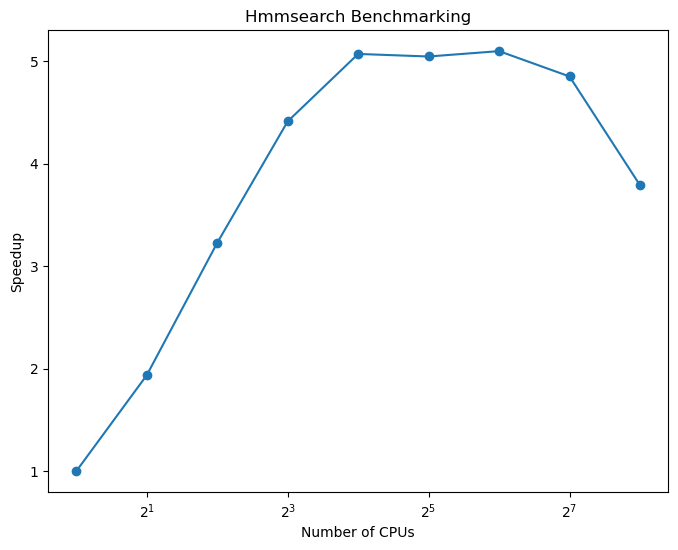

In [22]:
plt = plot_runs(HMMSEARCH_CSV_FILE, "Hmmsearch")
hmmsearch_filename = "Hmmsearch_Benchmarking.png"
plt.savefig(hmmsearch_filename, dpi=300, bbox_inches='tight')
plt.show()

In [25]:
HMMSCAN_CSV_FILE="data/hmmscan/results.csv"  

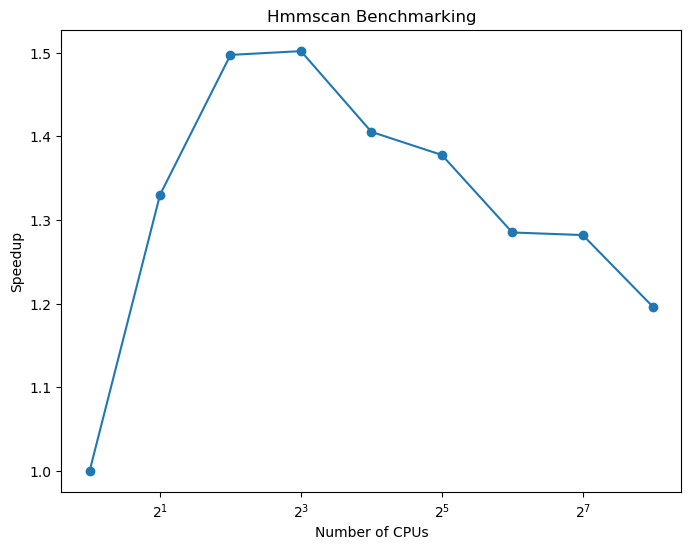

In [26]:
plt = plot_runs(HMMSCAN_CSV_FILE, "Hmmscan")
hmmscan_filename = "Hmmscan_Benchmarking.png"
plt.savefig(hmmscan_filename, dpi=300, bbox_inches='tight')
plt.show()